In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/GenreDataset.zip

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install hazm

In [ ]:
dirpath = "./GenreDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","genre"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'genre': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,genre
0,دل رفت بر کسیکه سیماش خوشست غم خوش نبود ولیک غ...,Robaee
1,مسکین دل من! که بی‌سرانجام بماند در بزم طرب ب...,Robaee
2,ای آن که همه گشایش بندِ منی یاری دهِ جانِ آرز...,Robaee
3,آن راز که پیوسته از آن میپرسم در جان من است و...,Robaee
4,از هجر تو ای نگار اندر نارم می‌سوزم ازین درد ...,Robaee
...,...,...
4917,صبا ز منزل جانان گذر دریغ مدار وز او به عاشق ...,Ghazal
4918,ای یار جفا کرده پیوند بریده این بود وفاداری و...,Ghazal
4919,این رنگ نگر که زلفش آمیخت وین فتنه نگر که چشم...,Ghazal
4920,عشق آن باشد که غایت نبودش هم نهایت هم بدایت ن...,Ghazal


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem     0
genre    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, genre]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        # u"\0x06F0-\0x06F9"
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'genre']]
df.columns = ['poem', 'genre']
df

,poem,genre
0,دل رفت بر کسیکه سیماش خوشست غم خوش نبود ولیک غ...,Robaee
1,مسکین دل من که بی سرانجام بماند در بزم طرب بی ...,Robaee
2,ای آن که همه گشایش بند منی یاری ده جان آرزومند...,Robaee
3,آن راز که پیوسته از آن می پرسم در جان من است و...,Robaee
4,از هجر تو ای نگار اندر نارم می سوزم ازین درد و...,Robaee
...,...,...
4917,صبا ز منزل جانان گذر دریغ مدار وز او به عاشق ب...,Ghazal
4918,ای یار جفا کرده پیوند بریده این بود وفاداری و ...,Ghazal
4919,این رنگ نگر که زلفش آمیخت وین فتنه نگر که چشمش...,Ghazal
4920,عشق آن باشد که غایت نبودش هم نهایت هم بدایت نب...,Ghazal


In [ ]:
labels = list(sorted(df['genre'].unique()))
labels

['Ghazal', 'Robaee']

In [ ]:
df['label_id'] = df['genre'].apply(lambda t: labels.index(t))
df

,poem,genre,label_id
0,دل رفت بر کسیکه سیماش خوشست غم خوش نبود ولیک غ...,Robaee,1
1,مسکین دل من که بی سرانجام بماند در بزم طرب بی ...,Robaee,1
2,ای آن که همه گشایش بند منی یاری ده جان آرزومند...,Robaee,1
3,آن راز که پیوسته از آن می پرسم در جان من است و...,Robaee,1
4,از هجر تو ای نگار اندر نارم می سوزم ازین درد و...,Robaee,1
...,...,...,...
4917,صبا ز منزل جانان گذر دریغ مدار وز او به عاشق ب...,Ghazal,0
4918,ای یار جفا کرده پیوند بریده این بود وفاداری و ...,Ghazal,0
4919,این رنگ نگر که زلفش آمیخت وین فتنه نگر که چشمش...,Ghazal,0
4920,عشق آن باشد که غایت نبودش هم نهایت هم بدایت نب...,Ghazal,0


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'genre']]
df.columns = ['poem', 'genre']
df


,poem,genre
0,دل کسیکه سیماش خوشست غم ولیک غمهاش خوشست جان ط...,Robaee
1,مسکین دل بزم طرب جام آرزوی یار سودا پخت سوداش ...,Robaee
2,گشایش بند یاری جان آرزومند نیکم گرنه بنده حکم ...,Robaee
3,راز پرسم جان جهان پرسم برون نیاید دل برون پرسم,Robaee
4,هجر نگار نارم سوزم درد نارم دست گردن نارم آغشت...,Robaee
...,...,...
4917,صبا منزل جانان گذر مدار عاشق دل خبر مدار شکر ش...,Ghazal
4918,یار جفا پیوند بریده وفاداری عهد ندیده کوی معرو...,Ghazal
4919,رنگ نگر زلفش آمیخت وین فتنه نگر چشمش انگیخت وی...,Ghazal
4920,عشق غایت نبودش بدایت نبودش رسم نبودش هزاران غا...,Ghazal


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
from keras.utils import pad_sequences

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 256
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['poem'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 23407 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['poem'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4922, 256)


In [ ]:
Y = pd.get_dummies(df['genre']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (4922, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3937, 256) (3937, 2)
(985, 256) (985, 2)


In [ ]:
import tensorflow as tf
loss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          5000000   
                                                                 
 dropout (Dropout)           (None, 256, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 10
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
111/111 [==============================] - 175s 1s/step - loss: 0.1653 - accuracy: 0.9292 - val_loss: 0.0129 - val_accuracy: 0.9975
Epoch 2/10
111/111 [==============================] - 158s 1s/step - loss: 0.0129 - accuracy: 0.9972 - val_loss: 0.0162 - val_accuracy: 0.9949
Epoch 3/10
111/111 [==============================] - 147s 1s/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0092 - val_accuracy: 0.9975
Epoch 4/10
111/111 [==============================] - 151s 1s/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0145 - val_accuracy: 0.9975
Epoch 5/10
111/111 [==============================] - 141s 1s/step - loss: 7.3772e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9975
Epoch 6/10
111/111 [==============================] - 142s 1s/step - loss: 3.5305e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9975
Epoch 7/10
111/111 [==============================] - 139s 1s/step - loss: 2.4870e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accu

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [ ]:
predictions = model.predict(X_test)
predictions.tolist()

In [ ]:
labelsdf = pd.DataFrame(Y_test)

In [ ]:
ldf = pd.from_dummies(labelsdf)
ldf = ldf.values.tolist()
ldf

In [ ]:
Y_pred = predictions.argmax(axis=-1).tolist()
Y_pred

In [ ]:
save_path = "/content/gdrive/MyDrive/GenreLSTMModel"

In [ ]:
model.save(save_path)

In [ ]:
import keras
loaded_model = keras.models.load_model(save_path)

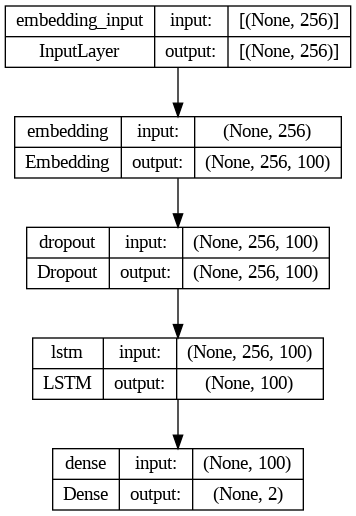

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(loaded_model, show_shapes=True)


In [ ]:
str = "دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود از خود خبر تا بی خبر چون آمدم دستم چو از نیرنگ او آمد به زیر سنگ او بر چهرهٔ گلرنگ او چون لاله در خون آمدم گاهی ز جان بی جان شدم گاهی ز دل بریان شدم هر لحظه دیگر سان شدم هر دم دگرگون آمدم در فرقت آن نازنین گشتم همه روی زمین گویی نبودم پیش ازین عاشق هم اکنون آمدم چون نیستی اندر عیان، در نیستی گشتم نهان تا هرچه دیدم در جهان از جمله بیرون آمدم از فقر رو کردم سیه عطار را کردم تبه رفعت رها کردم به ره از خویش بیرون آمدم"


In [ ]:
df1 = pd.DataFrame(columns=['poem', 'genre'])
df1.loc[0] = [str, "robaee"]
df1

,poem,genre
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,robaee


In [ ]:
id_label_map = {
    "ghazal": 0,
    "robaee": 1,
}
df1['genre'] = df1['genre'].map(id_label_map)
df1

,poem,genre
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,1


In [ ]:
df1.loc[0].values

array(['دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود از خود خبر تا بی خبر چون آمدم دستم چو از نیرنگ او آمد به زیر سنگ او بر چهرهٔ گلرنگ او چون لاله در خون آمدم گاهی ز جان بی جان شدم گاهی ز دل بریان شدم هر لحظه دیگر سان شدم هر دم دگرگون آمدم در فرقت آن نازنین گشتم همه روی زمین گویی نبودم پیش ازین عاشق هم اکنون آمدم چون نیستی اندر عیان، در نیستی گشتم نهان تا هرچه دیدم در جهان از جمله بیرون آمدم از فقر رو کردم سیه عطار را کردم تبه رفعت رها کردم به ره از خویش بیرون آمدم',
       1], dtype=object)

In [ ]:
df1['cleaned_poem'] = df1['poem'].apply(cleaning)
df1 = df1[['cleaned_poem', 'genre']]
df1.columns = ['poem', 'genre']
df1

,poem,genre
0,دوش از وثاق دلبری سرمست بیرون آمدم هیچم نبود ا...,1


In [ ]:
df1['cleaned_poem'] = df1['poem'].apply(removeStopWords)
df1 = df1[['cleaned_poem', 'genre']]
df1.columns = ['poem', 'genre']
df1

,poem,genre
0,دوش وثاق دلبری سرمست آمدم هیچم خبر خبر آمدم دس...,1


In [ ]:
X_new = tokenizer.texts_to_sequences(df1['poem'].values)
X_new = pad_sequences(X_new, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
prediction = loaded_model.predict(X_new)

1/1 [==============================] - 0s 304ms/step


In [ ]:
prediction.tolist()

[[0.9999110698699951, 0.00010907504474744201]]

In [ ]:
Y_new_pred= prediction.argmax(axis=-1).tolist()
Y_new_pred

[0]

In [ ]:
idToLabel = [ "ghazal",
    "robaee"]

print(idToLabel[Y_new_pred[0]])


ghazal
